<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/EnP_training/SPE_assignment3_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

This assignment is about the application of Python for well-test analysis. You're given a CSV data (have been loaded here), and your task is to **simulate the well transient response** (not to analyze it).

### Given reservoir properties

* Reservoir initial pressure 3,000 psia
* Porosity 15%
* Total compressibility 12 microsip
* Permeability 1,000 md
* Radius of wellbore 4 inch (1 inch = 0.0833 ft)
* Reservoir thickness 10 ft
* Oil viscosity 2 cp
* Distance from wellbore to reservoir outer boundary 8,000 ft 
* Oil FVF 1.33 RB/STB

### Read instruction carefully 😊

* To help you coding, refer to the section about "Modeling a Multirate Test" and "Modeling a Multiple Pressure Test" in our [session 5 notebook](https://bit.ly/python-welltest).

* There are 3 columns in the data, "Time" (in hours), "Rate" (in $m^3$/hour), and "Pressure" (in bar). 

* Don't forget to convert the "Rate" to barrel/day and convert "Pressure" to psia. 

* Do a modeling of multirate test using the "Time" and "Rate" data
* Do a modeling of multiple pressure test using the "Time" and "Pressure" data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# cloning to github repository 
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 819 (delta 85), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (819/819), 24.03 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (439/439), done.


In [ ]:
# import system
import sys
sys.path.append('/content/pyreservoir/welltest')

# functions you will use
from wellflo import * # import all functions
from wellanalysis import constant_rate_drawdown_test, constant_rate_buildup_test

In [ ]:
# filepath of the data
filepath = '/content/pyreservoir/data/welltest/Data_Well_Transient_Modeling.csv'

In [ ]:
Data = pd.read_csv(filepath)
Data["pressure (bar)"] = Data["pressure (bar)"].apply(lambda x: x*14.504)
Data["rate (m3/hr)"] = Data["rate (m3/hr)"].apply(lambda x: x*150.955)
Data = Data.rename(columns={'rate (m3/hr)':'rate(bbl/day)','pressure (bar)':'pressure(psia)'})
Data

,time (hr),rate(bbl/day),pressure(psia)
0,0,483.056,2000.000072
1,10,483.056,2000.000072
2,20,483.056,2000.000072
3,30,483.056,2000.000072
4,40,483.056,2000.000072
...,...,...,...
94,940,150.955,2025.004968
95,950,150.955,2025.004968
96,960,150.955,2025.004968
97,970,150.955,2025.004968


## Input reservoir properties

In [ ]:
# Input reservoir properties
poro = 0.15 
ct = 12E-6 
perm = 1000
rw = 4 * 0.08333 
h = 10
mu = 2 
re = 8000
Bo = 1.33

p_initial = 3000



## Modeling the Multirate Test (use timestep 0.1 hour)

In [ ]:
Data.head(10)

,time (hr),rate(bbl/day),pressure(psia)
0,0,483.056,2000.000072
1,10,483.056,2000.000072
2,20,483.056,2000.000072
3,30,483.056,2000.000072
4,40,483.056,2000.000072
5,50,483.056,2000.000072
6,60,483.056,2000.000072
7,70,603.820,2000.000072
8,80,603.820,2000.000072
9,90,603.820,2000.000072


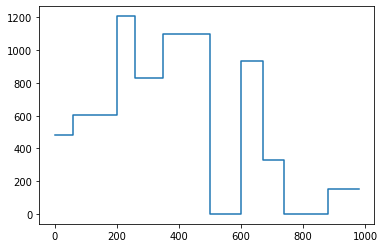

In [ ]:
# Define t and q from data
t_change = Data['time (hr)'].values
q_change = Data['rate(bbl/day)'].values


plt.step(t_change,q_change)
plt.show()

In [ ]:
time_finite = time_finite_acting(perm,poro,mu,ct,rw,re)
time_finite = np.round(time_finite,3)
print('Finite acting time is {} hrs'.format(time_finite))

Finite acting time is 218.43 hrs


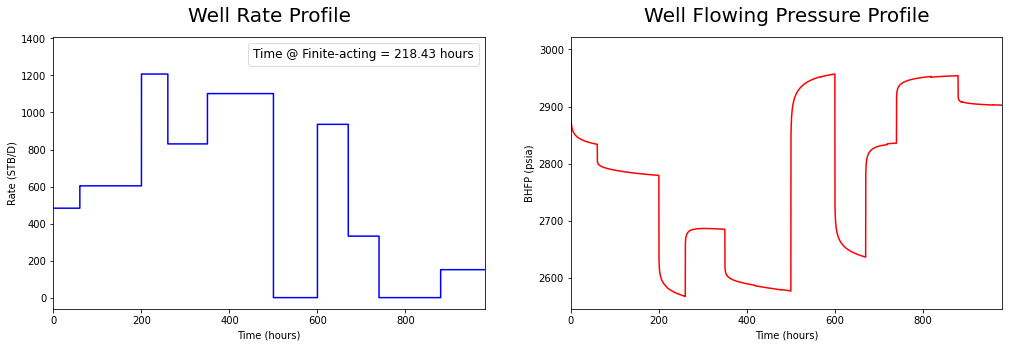

In [ ]:


t_step = 0.1

simulate_multirate_test(p_initial, t_step, t_change, q_change, re, rw, perm, poro, mu, ct, Bo, h)                        


## Modeling the Multiple Pressure Test (use timestep 0.1 hour)

In [ ]:
# Define t and p from data
poro = 0.15 
ct = 12E-6 
perm = 1000
rw = 4 * 0.08333 
h = 10
mu = 2 
re = 8000
Bo = 1.33

p_initial = 3000





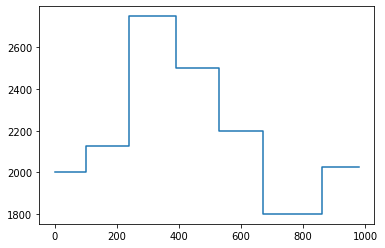

In [ ]:
t_change = Data['time (hr)'].values
p_change = Data['pressure(psia)'].values


plt.step(t_change,p_change)
plt.show()

In [ ]:
time_finite_multipsi = time_finite_acting(perm,poro,mu,ct,rw,re)
time_finite_multipsi = np.round(time_finite_multipsi,3)
print('Finite acting time is {} hrs'.format(time_finite_multipsi))

Finite acting time is 218.43 hrs


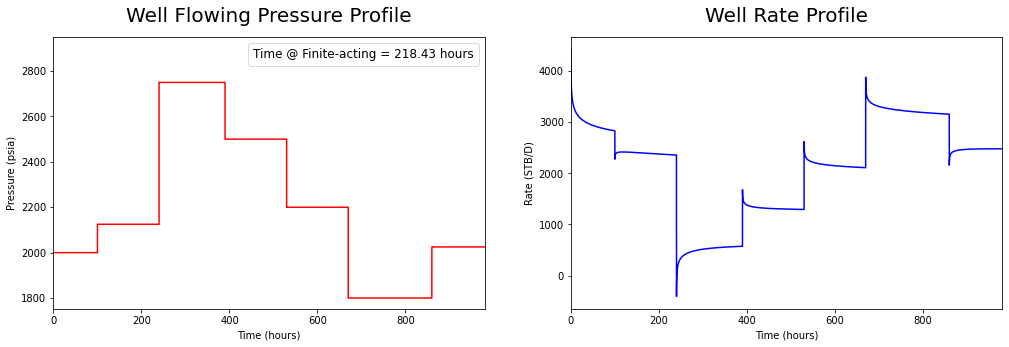

In [ ]:
t_step = 0.1

simulate_multipressure_test(p_initial, t_step, t_change, p_change, 
                            re, rw, perm, poro, mu, ct, Bo, h)